In [17]:
import re
import nltk
import string
import itertools
import pandas as pd
import nltk
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')

from nltk import pos_tag, ne_chunk

import warnings

warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /Users/ali/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /Users/ali/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ali/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ali/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/ali/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


In [2]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

1. Read the data using pandas 
2. Keep text and sentiment and drop the other columns
3. Tokenize
4. Remove punctuations
5. **Remove numbers**
6. Remove words of 1 or 2 characters
7. Remove stop words
8. Convert to lower case
9. Use stemmer
10. Create Bag of Words
11. Compute TF
12. Put a threshold for TF and retain only those words above the threshold TF
13. Finally u will get the Term Document Matrix. This will be the independent variable set: They will be the X variables
14. Use the sentiment column as the label: y
15. X & y will be a supervised classification problem
16. Use any classification algorithm like random forest for classification.

## Read the data using pandas

In [3]:
# n_samples = 100
n_samples = 2_000
# read data
data = pd.read_csv('data/imdb_master.csv')
# remove unsupervised data
data=data[data.label != 'unsup']
# take a sample from the data as df
df= data.sample(n_samples, random_state=0)

## Keep text and sentiment and drop the other columns

In [4]:
df = df.drop(['Unnamed: 0', 'file', 'type'], axis=1)
df.columns = ['review', 'sentiment']
df=df[df.sentiment != 'unsup']

# n_samples = 2_000
# n_samples = 100
# df = data.sample(n_samples, random_state=0)

df.sentiment.value_counts()

neg    1015
pos     985
Name: sentiment, dtype: int64

## Tokenize

In [5]:
def tokenize_text(text):
    
    #Tokenize words
    tokens = nltk.word_tokenize(text)
    
    return tokens

## Remove punctuations

In [6]:
def normailze_text(text):
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove extra characters
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
    
    # Remove punctuation characters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text) 
    
    # Remove symbols
    text = re.sub(r'[^A-Za-z\s]',r'',text)
    text = re.sub(r'\n',r'',text)
    # Remove two characters
    resulst =[]
    for i in text.split(' '):
        resulst.append(re.sub(r'^\w{0,2}$',r'',i))
    text = ' '.join(resulst) 
    return text

In [7]:
def remove_stopwords(tokens):
    
    stop_words = stopwords.words('english')
    token_list = []
    
    for word in tokens:
        if not word in stop_words:
            token_list.append(word)
            
    
    return token_list

## Use stemmer

In [8]:
def stem_lem_words(tokens):
    
    #Lemmatizing tokens
    tokens = [lemmatizer.lemmatize(token, pos='v') for token in tokens]

    return tokens

In [9]:
df['result'] = df.review.apply(normailze_text)
df['result'] = df.result.apply(tokenize_text)
df['result'] = df.result.apply(remove_stopwords)
df['result'] = df.result.apply(stem_lem_words)


In [10]:
df

,review,sentiment,result
11841,Al Pacino was once an actor capable of making ...,neg,"[pacino, actor, capable, make, role, work, wit..."
19602,"If you read the book by Carl Hiaasen, the movi...",pos,"[read, book, carl, hiaasen, movie, follow, pre..."
45519,This movie is sort of a Carrie meets Heavy Met...,pos,"[movie, sort, carrie, meet, heavy, metal, high..."
25747,This movie was like a bad indie with A-list ta...,neg,"[movie, like, bad, indie, list, talent, plot, ..."
42642,"In the '70s, Charlton Heston starred in sci-fi...",pos,"[charlton, heston, star, sci, flick, vary, qua..."
...,...,...,...
6087,Just had the misfortune to see this truly awfu...,neg,"[misfortune, see, truly, awful, film, think, s..."
27269,To confess having fantasies about Brad Pitt is...,neg,"[confess, fantasy, brad, pitt, pretty, tough, ..."
455,"Where do I begin, its one of the most frustrat...",neg,"[begin, one, frustrate, movies, see, make, lot..."
11984,"I like bad films, but this thing is a steaming...",neg,"[like, bad, film, thing, steam, heap, shaky, c..."


In [11]:
def listToString(s): 
    
    # initialize an empty string
    str1 = " " 
    # return string  
    return (str1.join(s))

In [26]:
vectorizer = CountVectorizer()
bowmatrix = vectorizer.fit_transform(df["result"].apply(listToString))

In [27]:
new_df = pd.DataFrame(bowmatrix.toarray(), columns=vectorizer.get_feature_names()) # TERM DOCUEMNT MATRIX

In [28]:
new_df

,aadha,aah,aaliyah,aames,aamir,aap,aapke,aardman,aargh,aaron,...,zonked,zoo,zoog,zoolander,zoom,zoot,zora,zucker,zuckerman,zulu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
new_df

,aadha,aah,aaliyah,aames,aamir,aap,aapke,aardman,aargh,aaron,...,zonked,zoo,zoog,zoolander,zoom,zoot,zora,zucker,zuckerman,zulu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
pca_6 = PCA(n_components=800)
pca_6.fit_transform(new_df.T)
np.cumsum(pca_6.explained_variance_ratio_*100)

array([14.6576826 , 18.143872  , 19.76892503, 20.60885542, 21.41084314,
       22.13997987, 22.81307144, 23.46778255, 24.10892237, 24.69333458,
       25.26330437, 25.79840112, 26.29951949, 26.76954958, 27.22666703,
       27.6717075 , 28.10370689, 28.53353262, 28.94856877, 29.34932145,
       29.73340768, 30.10512017, 30.4718391 , 30.83521971, 31.19395027,
       31.54375017, 31.88664192, 32.224336  , 32.55901765, 32.88959869,
       33.21282174, 33.53210762, 33.84541897, 34.15250303, 34.45700011,
       34.75513156, 35.05027006, 35.3434432 , 35.63242636, 35.91827725,
       36.20092611, 36.47913489, 36.75413634, 37.02778608, 37.29872051,
       37.56877781, 37.83638421, 38.0976944 , 38.35793611, 38.61387636,
       38.86743771, 39.11796781, 39.36661324, 39.61043756, 39.85226806,
       40.09122516, 40.32846622, 40.56335232, 40.79562934, 41.02715484,
       41.25733946, 41.48589346, 41.71160633, 41.93478154, 42.15545635,
       42.37350873, 42.58951528, 42.80217854, 43.01396906, 43.22

In [42]:
pca_6.components_.T.shape

(2000, 800)

In [49]:
pca_df = pd.DataFrame(pca_6.components_.T)

In [57]:
pca_df['sentiment'] =df.sentiment.reset_index().sentiment

In [60]:
df.sentiment.reset_index()['sentiment']

0       neg
1       pos
2       pos
3       neg
4       pos
       ... 
1995    neg
1996    neg
1997    neg
1998    neg
1999    neg
Name: sentiment, Length: 2000, dtype: object

In [58]:
pca_df

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,sentiment
0,0.011240,-0.006550,-0.011899,-0.013769,-0.013185,0.016935,0.000017,0.012684,-0.003395,-0.013029,...,-0.021017,0.010140,0.002647,0.032604,-0.015440,-0.009015,-0.013738,-0.002146,-0.007791,neg
1,0.027242,-0.051819,0.028632,-0.034024,0.029705,-0.023771,-0.003207,0.007346,0.017021,-0.013399,...,-0.027676,-0.024850,-0.002474,0.009659,0.019652,0.025282,-0.029867,-0.015300,-0.000923,pos
2,0.006288,0.000035,0.004069,-0.007098,0.001450,0.002059,-0.016547,-0.035202,-0.000533,0.017631,...,-0.007361,-0.011692,0.026180,-0.011763,-0.011508,0.006695,0.023961,0.021539,-0.003854,pos
3,0.012751,-0.009278,-0.008107,0.010438,-0.021248,0.008046,0.010209,0.004611,-0.004493,0.000174,...,0.009395,-0.005445,0.019341,0.005449,0.002758,0.003042,-0.001352,0.015993,-0.013623,neg
4,0.006623,-0.004747,-0.003633,0.009853,0.011358,-0.004994,-0.011347,0.000780,0.005489,-0.007390,...,0.017772,0.013856,-0.003461,-0.013250,0.030810,-0.016806,-0.024768,0.002780,0.027186,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.009976,0.012307,0.002459,0.003015,0.003090,0.001443,-0.000947,-0.011139,-0.009934,-0.003345,...,0.016432,0.020880,-0.006276,-0.036130,-0.013547,-0.037561,-0.031914,0.014276,0.009492,neg
1996,0.007540,-0.001490,-0.013722,-0.002887,-0.011727,0.018141,-0.021131,-0.005223,-0.018683,0.003508,...,-0.025037,0.029124,-0.017228,-0.016373,0.004552,0.026578,-0.005388,-0.020362,-0.013969,neg
1997,0.051644,-0.062083,-0.013558,0.009049,0.004014,-0.020606,-0.060911,-0.044010,0.026443,0.001120,...,-0.019546,0.020534,-0.008518,0.006862,-0.006175,-0.001952,-0.012519,-0.020318,0.009136,neg
1998,0.014935,0.016644,0.005626,0.009308,-0.016337,0.018993,-0.011060,0.015351,0.011460,0.012747,...,0.016212,0.002632,-0.008352,-0.026433,-0.002609,0.034748,0.003436,0.010110,-0.017275,neg


In [66]:
pca_df.dropna()

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,sentiment
0,0.011240,-0.006550,-0.011899,-0.013769,-0.013185,0.016935,0.000017,0.012684,-0.003395,-0.013029,...,-0.021017,0.010140,0.002647,0.032604,-0.015440,-0.009015,-0.013738,-0.002146,-0.007791,neg
1,0.027242,-0.051819,0.028632,-0.034024,0.029705,-0.023771,-0.003207,0.007346,0.017021,-0.013399,...,-0.027676,-0.024850,-0.002474,0.009659,0.019652,0.025282,-0.029867,-0.015300,-0.000923,pos
2,0.006288,0.000035,0.004069,-0.007098,0.001450,0.002059,-0.016547,-0.035202,-0.000533,0.017631,...,-0.007361,-0.011692,0.026180,-0.011763,-0.011508,0.006695,0.023961,0.021539,-0.003854,pos
3,0.012751,-0.009278,-0.008107,0.010438,-0.021248,0.008046,0.010209,0.004611,-0.004493,0.000174,...,0.009395,-0.005445,0.019341,0.005449,0.002758,0.003042,-0.001352,0.015993,-0.013623,neg
4,0.006623,-0.004747,-0.003633,0.009853,0.011358,-0.004994,-0.011347,0.000780,0.005489,-0.007390,...,0.017772,0.013856,-0.003461,-0.013250,0.030810,-0.016806,-0.024768,0.002780,0.027186,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.009976,0.012307,0.002459,0.003015,0.003090,0.001443,-0.000947,-0.011139,-0.009934,-0.003345,...,0.016432,0.020880,-0.006276,-0.036130,-0.013547,-0.037561,-0.031914,0.014276,0.009492,neg
1996,0.007540,-0.001490,-0.013722,-0.002887,-0.011727,0.018141,-0.021131,-0.005223,-0.018683,0.003508,...,-0.025037,0.029124,-0.017228,-0.016373,0.004552,0.026578,-0.005388,-0.020362,-0.013969,neg
1997,0.051644,-0.062083,-0.013558,0.009049,0.004014,-0.020606,-0.060911,-0.044010,0.026443,0.001120,...,-0.019546,0.020534,-0.008518,0.006862,-0.006175,-0.001952,-0.012519,-0.020318,0.009136,neg
1998,0.014935,0.016644,0.005626,0.009308,-0.016337,0.018993,-0.011060,0.015351,0.011460,0.012747,...,0.016212,0.002632,-0.008352,-0.026433,-0.002609,0.034748,0.003436,0.010110,-0.017275,neg


In [72]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score,\
            f1_score
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

In [73]:
y = df.sentiment.reset_index().sentiment
x = pd.DataFrame(pca_6.components_.T)
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=123) 

In [74]:
Log_Reg = LogisticRegression()
Log_Reg.fit(x_train, y_train)


LogisticRegression()

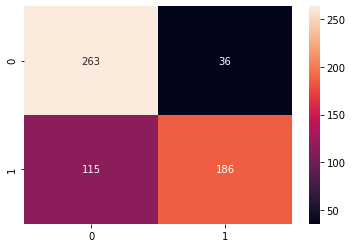

In [75]:
y_pred_log = Log_Reg.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y_pred_log), annot=True, fmt=".0f");


In [76]:
print('For Logistic Regression model')
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_score_log = f1_score(y_test, y_pred_log)

print ('accuracy =',accuracy_log * 100)
print ('precision =',precision_log * 100)
print ('recall =',recall_log * 100)
print ('f1_score =',f1_score_log * 100)


For Logistic Regression model


ValueError: pos_label=1 is not a valid label. It should be one of ['neg', 'pos']